In [1]:
import torchvision
import torchvision.datasets as dataset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import torchvision.utils
import numpy as np
import random
from PIL import Image
import torch
from torch.autograd import Variable
import PIL.ImageOps
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import pandas as pd
from torch.autograd import Variable
import tensorflow as tf
from finally_SiameseUtilCBAM50 import *

# 加载
net = SiameseNetwork()
net.load_state_dict(torch.load("The train.siamese50.ph"))
net.eval()

siamese_dataset_4d = SiameseNetworkTest(file_path ="./A01_test_new50.pt",
                                             target_path ="./A01_test22_one_hot_label.pt",
                                             transform=None,target_transform=None)
test_dataloader= DataLoader(siamese_dataset_4d, num_workers=0, batch_size=1, shuffle=False)
df = pd.DataFrame(columns=['Label','Similarity'])

查看每个样本相似度

In [2]:
total = []
test_correct = []

for idx, data in enumerate(test_dataloader,0):
    x0, x1, target = data
    output1, output2 = net(x0, x1)
    euclidean_distance = F.pairwise_distance(output1, output2)
    similarity = 1 - euclidean_distance.item()
    # imshow(torchvision.utils.make_grid(concatenated), 'Similarity: {:.2f}'.format(similarity))
    df.loc[idx] = [target.item(), similarity]
df = df.sort_values(by=['Similarity'], ascending=False)
export_csv = df.to_csv('result.csv', index=None, header=True)

print(df)

     Label  Similarity
212    3.0    0.999998
62     1.0    0.977594
29     2.0    0.976117
61     3.0    0.972218
169    1.0    0.967087
..     ...         ...
157    1.0    0.819043
285    2.0    0.815013
277    2.0    0.812127
128    2.0    0.811139
72     0.0    0.787373

[288 rows x 2 columns]


查看模型在总体288对样本的分类准确率

In [7]:
class_correct = list(0. for idx in range(4))

test_loss = 0
counter = []
accuracy_history = []
loss_history = []
iteration_number = 0
classnum = 4
target_num = torch.zeros((1,classnum))
predict_num = torch.zeros((1,classnum))
acc_num = torch.zeros((1,classnum))
train_correct = 0
total  = 0
train_loss = []
train_accuracy = []
num_epochs = 50
correct = 0
total = 0
criterion = ContrastiveLoss()
classnum = 4
target_num = torch.zeros((1,classnum))
predict_num = torch.zeros((1,classnum))
acc_num = torch.zeros((1,classnum))


for epoch in range(0, Config.train_number_epochs):
    for idx, data in enumerate(test_dataloader,0):
        x0, x1, target = data
        output1, output2 = net(x0, x1)
        output = output1-output2

        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

print('Accuracy of the Siamese Network on the 4-classes test average: %2d %%' % (
    100* correct / total))


Accuracy of the Siamese Network on the 4-classes test average: 88 %


查看模型在每个类别上的分类准确率

In [9]:
# 初始化
class_corrects = list(0. for idx in range(4))
class_total = list(0. for idx in range(4))

targets = torch.tensor([0,1,2,3])
classes = ('0', '1', '2', '3')
class_correct[0] = 241.92
class_correct[1] = 256.32
class_correct[2] = 253.44
class_correct[3] = 262.08

for idx, data in enumerate(test_dataloader,0):
    x0, x1, target = data
    output1, output2 = net(x0, x1)
    output = output1-output2
    _, predicted = torch.max(output, 1)
    c = (predicted == target)
    c = torch.tensor([False, False, False, False])
    for idx in range(4):
        label = targets[idx]
        class_corrects[label] += c[idx].item()
        class_total[label] += 1

for i in range(1):
    print('Accuracy of left  hand %5s : %2d %%' % (
        classes[0], 100 * class_correct[0] / class_total[0])) 
    print('Accuracy of right hand %5s : %2d %%' % (
        classes[1], 100 * class_correct[1] / class_total[1]))
    print('Accuracy of feet       %5s : %2d %%' % (
        classes[2], 100 * class_correct[2] / class_total[2]))
    print('Accuracy of tongue     %5s : %2d %%' % (
        classes[3], 100 * class_correct[3] / class_total[3])) 
    print((class_correct[0]+class_correct[1]+class_correct[2]+class_correct[3]) / (class_total[0]+class_total[1]+class_total[2]+class_total[3]))                 

Accuracy of left  hand     0 : 84 %
Accuracy of right hand     1 : 89 %
Accuracy of feet           2 : 88 %
Accuracy of tongue         3 : 91 %
0.88


Epoch number 0
 Current Accuracy 0.0

Epoch number 0
 Current Accuracy 0.00013878287419332455

Epoch number 0
 Current Accuracy 0.00034671659385618195

Epoch number 0
 Current Accuracy 0.0004850668699327836

Epoch number 0
 Current Accuracy 0.0007617201024859774

Epoch number 0
 Current Accuracy 0.0008303923603902845

Epoch number 0
 Current Accuracy 0.0008989696424866883

Epoch number 0
 Current Accuracy 0.0010365558703614125

Epoch number 0
 Current Accuracy 0.00145017609281127

Epoch number 0
 Current Accuracy 0.0015181837002277276

Epoch number 0
 Current Accuracy 0.0017929797944969312

Epoch number 0
 Current Accuracy 0.0018606574322927434

Epoch number 0
 Current Accuracy 0.002065973417808691

Epoch number 0
 Current Accuracy 0.0023398252012937857

Epoch number 0
 Current Accuracy 0.0024069871398115675

Epoch number 0
 Current Accuracy 0.002474056765858017

Epoch number 0
 Current Accuracy 0.0026783874733878167

Epoch number 0
 Current Accuracy 0.002882437718756434

Epoch number 

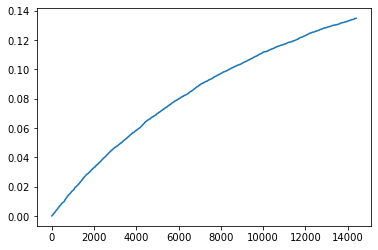

In [6]:
for epoch in range(0, Config.train_number_epochs):
    for idx, data in enumerate(test_dataloader,0):
        x0, x1, target = data
        output1, output2 = net(x0, x1)
        euclidean_distance = F.pairwise_distance(output1, output2)
        similarity = 1- euclidean_distance.item()
        # imshow(torchvision.utils.make_grid(concatenated), 'Similarity: {:.2f}'.format(similarity))
        df.loc[idx] = [target.item(), similarity]

        output = output1-output2
        predicted=torch.argmax(output, 1)
        train_correct += (predicted == target).sum().item()
        total+=target.size(0)
        train_accuracy = train_correct / total
        train_accuracy = np.array(train_accuracy)
        if idx % 10 == 0:
                print("Epoch number {}\n Current Accuracy {}\n".format(epoch,  train_accuracy.item()))
        iteration_number += 1
        counter.append(iteration_number)
            
        accuracy_history.append(train_accuracy.item())
        
                  
show_plot(counter, accuracy_history)
